In [39]:
startSwank 4009

Swank is already running


NIL

In [40]:
*default-pathname-defaults*

#P"/Users/meister/Development/membrane-packer/"

In [41]:
(asdf:load-asd (merge-pathnames "membrane-packer.asd"))

#<DEFINE-OP >

In [42]:
quickload "membrane-packer"

To load "membrane-packer":
  Load 1 ASDF system:
    membrane-packer

; Loading "membrane-packer"



("membrane-packer")

## The following parameter defines the density of the lipids.  
## I read somewhere that 0.0098 is the optimal density.
## Lower density values like 0.008 should decrease the collisions and make fitting things easier.
## If you change the value below - you need to evaluate everything that follows.

In [43]:
(defparameter membrane-packer::*lipid-density* 0.0070) ; 0.0098)

MEMBRANE-PACKER::*LIPID-DENSITY*

In [44]:
(membrane-packer::setup-system-membrane-force-field)

#<FORCE-FIELD >

In [45]:
(list-force-fields)

:DEFAULT (#<FORCE-FIELD gaff.dat> #<FORCE-FIELD frcmod.ions234lm_126_tip3p>
 #<FORCE-FIELD frcmod.ionsjc_tip3p> #<FORCE-FIELD frcmod.tip3p>
 #<FORCE-FIELD lipid14.dat> #<FORCE-FIELD frcmod.ff14SB>
 #<FORCE-FIELD parm10.dat> #<FORCE-FIELD >)
:SYSTEM-MEMBRANE (#<FORCE-FIELD > #<FORCE-FIELD >)


NIL

In [46]:
setupAmberPaths

(#P"/Users/meister/Development/amber18/dat/antechamber/"
 #P"/Users/meister/Development/amber18/dat/leap/cmd/"
 #P"/Users/meister/Development/amber18/dat/leap/parm/"
 #P"/Users/meister/Development/amber18/dat/leap/lib/"
 #P"/Users/meister/Development/amber18/dat/leap/prep/")

In [47]:
source "leaprc.protein.ff14SB"

Warning!  Skipping 10-12 hbond in #<IOSTREAM-STREAM #P"/Users/meister/Development/amber18/dat/leap/parm/parm10.dat" file-pos 56064>
Warning!  Skipping force field atom equivalences in #<IOSTREAM-STREAM #P"/Users/meister/Development/amber18/dat/leap/parm/parm10.dat" file-pos 56146>
Adding force field parm10.dat to DEFAULT
Adding force field frcmod.ff14SB to DEFAULT


T

In [48]:
source "leaprc.lipid14"

Warning!  Skipping 10-12 hbond in #<IOSTREAM-STREAM #P"/Users/meister/Development/amber18/dat/leap/parm/lipid14.dat" file-pos 19299>
Warning!  Skipping force field atom equivalences in #<IOSTREAM-STREAM #P"/Users/meister/Development/amber18/dat/leap/parm/lipid14.dat" file-pos 19407>
Adding force field lipid14.dat to DEFAULT


T

In [49]:
source "leaprc.water.tip3p"

Adding force field frcmod.tip3p to DEFAULT
Adding force field frcmod.ionsjc_tip3p to DEFAULT
Adding force field frcmod.ions234lm_126_tip3p to DEFAULT


T

In [50]:
source "leaprc.gaff"

Warning!  Skipping 10-12 hbond in #<IOSTREAM-STREAM #P"/Users/meister/Development/amber18/dat/leap/parm/gaff.dat" file-pos 477637>
Warning!  Skipping force field atom equivalences in #<IOSTREAM-STREAM #P"/Users/meister/Development/amber18/dat/leap/parm/gaff.dat" file-pos 477719>
Adding force field gaff.dat to DEFAULT


T

In [51]:
prot = loadMoe data/merck_suvorexant_derivatives.moe

#<AGGREGATE NIL 0>

In [52]:
show prot

#<NGLV:NGLWIDGET>

In [53]:
ligands = (loop for index from 3 to 20 collect (removeMatter prot (molid prot index)))

(#<MOLECULE NIL 3> #<MOLECULE NIL 4> #<MOLECULE NIL 5> #<MOLECULE NIL 6>
 #<MOLECULE NIL 7> #<MOLECULE NIL 8> #<MOLECULE NIL 9> #<MOLECULE NIL 10>
 #<MOLECULE NIL 11> #<MOLECULE NIL 12> #<MOLECULE NIL 13> #<MOLECULE NIL 14>
 #<MOLECULE NIL 15> #<MOLECULE NIL 16> #<MOLECULE NIL 17> #<MOLECULE NIL 18>
 #<MOLECULE NIL 19> #<MOLECULE NIL 20>)

In [54]:
desc ligands

Describing (#<MOLECULE NIL 3> #<MOLECULE NIL 4> #<MOLECULE NIL 5> #<MOLECULE NIL 6>
 #<MOLECULE NIL 7> #<MOLECULE NIL 8> #<MOLECULE NIL 9> #<MOLECULE NIL 10>
 #<MOLECULE NIL 11> #<MOLECULE NIL 12> #<MOLECULE NIL 13> #<MOLECULE NIL 14>
 #<MOLECULE NIL 15> #<MOLECULE NIL 16> #<MOLECULE NIL 17> #<MOLECULE NIL 18>
 #<MOLECULE NIL 19> #<MOLECULE NIL 20>)


(#<MOLECULE NIL 3> #<MOLECULE NIL 4> #<MOLECULE NIL 5> #<MOLECULE NIL 6>
 #<MOLECULE NIL 7> #<MOLECULE NIL 8> #<MOLECULE NIL 9> #<MOLECULE NIL 10>
 #<MOLECULE NIL 11> #<MOLECULE NIL 12> #<MOLECULE NIL 13> #<MOLECULE NIL 14>
 #<MOLECULE NIL 15> #<MOLECULE NIL 16> #<MOLECULE NIL 17> #<MOLECULE NIL 18>
 #<MOLECULE NIL 19> #<MOLECULE NIL 20>) - cons


NIL

In [55]:
foo = (sketch2d:sketch2d (fourth ligands) :accumulate-coordinates t)

Missing-h NIL


#<SKETCH2D:SKETCH2D>

In [56]:
(show (sketch2d::dynamics foo))

#<NGLV:NGLWIDGET>

Missing-h NIL


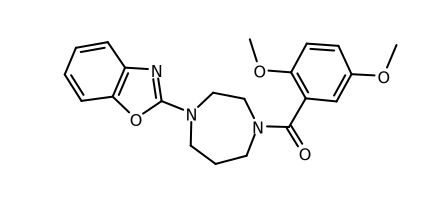

In [57]:
show (sketch2d:sketch2d (fourth ligands))

In [58]:
desc prot

Describing #<AGGREGATE NIL 0>


#<MOLECULE NIL 1> 3356 atoms
#<MOLECULE NIL 2> 1479 atoms



NIL

In [59]:
set prot/1.1 name :NPRO
set prot/1.205 name :CGLN
set prot/2.206 name :NLYS
set prot/2.293 name :CCYS

setting #<RESIDUE :PRO 1>  property: :NAME  value: :NPRO
setting #<RESIDUE :GLN 205>  property: :NAME  value: :CGLN
setting #<RESIDUE :LYS 206>  property: :NAME  value: :NLYS
setting #<RESIDUE :CYS 293>  property: :NAME  value: :CCYS


NIL

In [60]:
assignAtomTypes prot

Assigned 4835 types of a total of 4835 atoms.


NIL

In [61]:
(move-geometric-center-to-origin prot)

NIL

In [62]:
(show prot :axes t)

#<NGLV:NGLWIDGET>

# Test membrane crossing

In [63]:
(core:getpid)

74168

Create a membrane

In [64]:
memb = (membrane-packer:build-ga-membrane prot)

There are 41 top-lipids
one-lipid-area -> 84.94865912127118d0  lipid-area -> 5819.5
    there should be 62
Adding solute 73 #collisions 2
Adding solute 37 #collisions 2
Adding solute 59 #collisions 6
Adding solute 91 #collisions 8
Adding solute 53 #collisions 36
Adding solute 51 #collisions 158
Adding solute 47 #collisions 364
Adding solute 65 #collisions 404
Adding solute 61 #collisions 462
Adding solute 49 #collisions 510
Adding solute 63 #collisions 518
Adding solute 77 #collisions 566
Adding solute 67 #collisions 566
Adding solute 79 #collisions 572
Adding solute 75 #collisions 582
There are 41 bottom-lipids
one-lipid-area -> 84.94865912127118d0  lipid-area -> 5921.25
    there should be 63
Adding solute 38 #collisions 4
Adding solute 34 #collisions 10
Adding solute 92 #collisions 34
Adding solute 82 #collisions 90
Adding solute 62 #collisions 132
Adding solute 36 #collisions 192
Adding solute 52 #collisions 232
Adding solute 68 #collisions 316
Adding solute 78 #collisions 464
Addi

#<MEMBRANE-PACKER::GA-MEMBRANE>

Treat the lipids like large 5.2A radius spheres and optimize their placement in both membrane leaves.

In [65]:
(membrane-packer::optimize-lipid-placement memb)

(:TOP :BOTTOM)

In [66]:
agg = (membrane-packer::build-aggregate-from-ga-membrane memb)

#<AGGREGATE NIL 0>

In [68]:
v = show agg

#<NGLV:NGLWIDGET>

In [72]:
(membrane-packer:add-lipid-spheres-as-shape v memb)

T

In [73]:
v1 = show prot

#<NGLV:NGLWIDGET>

In [74]:
(membrane-packer:add-lipid-spheres-as-shape v1 memb)

T

Build a population of the membranes with the lipids in different conformations

In [30]:
membranes = (membrane-packer::build-population memb :population-size 10)

(#<MEMBRANE-PACKER::GA-MEMBRANE> #<MEMBRANE-PACKER::GA-MEMBRANE>
 #<MEMBRANE-PACKER::GA-MEMBRANE> #<MEMBRANE-PACKER::GA-MEMBRANE>
 #<MEMBRANE-PACKER::GA-MEMBRANE> #<MEMBRANE-PACKER::GA-MEMBRANE>
 #<MEMBRANE-PACKER::GA-MEMBRANE> #<MEMBRANE-PACKER::GA-MEMBRANE>
 #<MEMBRANE-PACKER::GA-MEMBRANE> #<MEMBRANE-PACKER::GA-MEMBRANE>)

In [31]:
memb0 = (first membranes)

#<MEMBRANE-PACKER::GA-MEMBRANE>

In [32]:
memb1 = (second membranes)

#<MEMBRANE-PACKER::GA-MEMBRANE>

Calculate the number of atomic collisions between lipids and between lipid and protein.

In [33]:
(membrane-packer::score-ga-membrane memb0)

4484

In [34]:
(membrane-packer::score-ga-membrane memb1)

4566

The the two membrands and find a strip in each of them that contain the same number of lipids and then swap the strips to create a child membrane that combines the two strips.

In [35]:
memb-cross = (membrane-packer::cross-two-membranes memb0 memb1)

#<MEMBRANE-PACKER::GA-MEMBRANE>

In [36]:
(membrane-packer::score-ga-membrane memb-cross)

4840

In [37]:
agg-cross = (membrane-packer::build-aggregate-from-ga-membrane memb-cross)

#<AGGREGATE NIL 0>

In [38]:
show agg-cross

#<NGLV:NGLWIDGET>

## This is the main way of building membranes. 
1. It constructs a template membrane
2. Then it optimizes the positions of the lipids using spheres.
3. Then it builds a population of the membranes.
4. Then a population of them is built.
5. Finally it applies a genetic algorithm to optimize towards a membrane with no collisions between atoms.

What you are going to see is that the least number of collisions list will converge on about 350 and not go down from there.  Even if you run out the number of generations to 1000 - it won't get better than about 350.

... least collisions -> (378 387 388 391 398 401 402 410 412 412)

In [ ]:
scored-membranes = (membrane-packer:pack prot :parallel t :number-of-generations 20)

The first member of the list of membranes has the fewest collisions.

In [ ]:
best-memb = (membrane-packer::membrane (first scored-membranes))

In [ ]:
agg-av = (multiple-value-list (membrane-packer::build-aggregate-from-ga-membrane best-memb))

In [ ]:
membagg = (membrane-packer::build-aggregate-from-ga-membrane best-memb)

In [ ]:
show membagg

In [ ]:
av = (second agg-av)

In [ ]:
v = (show membagg)

In [ ]:
(defparameter close-contacts (membrane-packer::close-contacts av))

In [ ]:
(membrane-packer:add-close-contacts-as-shape v close-contacts :radius 2.0)

-----------

# Everything below here is bits and pieces of useful stuff but it doesn't evaluate straight through.

In [ ]:
av = (second agg-av)

In [ ]:
(defparameter *rbmin* (membrane-packer::build-rigid-body-minimizer memb :debug t))

In [ ]:
*rbmin*

In [ ]:
(defparameter *rbdynamics* (membrane-packer::build-rigid-body-dynamics |memb| :debug t))

In [ ]:
(defparameter *shapes* (membrane-packer::rigid-body-dynamics-axes-as-shape-using-nonbond-code *rbdynamics*))

In [ ]:
(show |membagg| :shapes (list :centers *shapes*))

In [ ]:
*rbdynamics*

In [ ]:
(apropos "zero")

In [ ]:
(loop for index below (length (membrane-packer::force *rbdynamics*)) do (setf (elt (membrane-packer::force *rbdynamics*) index) 0.0))

In [ ]:
(chem:evaluate-energy-force (membrane-packer::energy-function *rbdynamics*)
                            (membrane-packer::coordinates *rbdynamics*)
                            t
                            (membrane-packer::force *rbdynamics*))

In [ ]:
(membrane-packer::advance-rigid-body-dynamics *rbdynamics*)

In [ ]:
(dotimes (i 30) (format t "Step ~a~%" i) (finish-output) (membrane-packer::advance-rigid-body-dynamics *rbdynamics*))

In [ ]:
(defparameter *traj* (membrane-packer::trajectory *rbdynamics*))

In [ ]:
(change-class *traj* 'cando-jupyter:cando-trajectory)

In [ ]:
(defparameter *ss-traj* (nglv:get-structure-string *traj*))

In [ ]:
(show *traj*)

In [ ]:
(show (membrane-packer::trajectory *rbdynamics*))

In [ ]:
(apropos "rigid-body")

In [ ]:
(apropos "write-nonbond-atom")

In [ ]:
(chem:rigid-body-energy-function-terms (car *efp*))

In [ ]:
(defparameter *atoms* (make-array 1024 :adjustable t :fill-pointer 0))
(chem:write-nonbond-atoms-to-complex-vector (first (chem:rigid-body-energy-function-terms (car *efp*))) *atoms*)
nil

In [ ]:
(defparameter *atom-coords* (make-array 1024 :adjustable t :fill-pointer 0))
(defparameter *rb-coords* ())
(chem:write-nonbond-atom-coordinates-to-complex-vector-float (first (chem:rigid-body-energy-function-terms (car *efp*))) *coords*)
nil

In [ ]:
show (sketch2d:sketch2d |lig4|)

In [ ]:
assignAtomTypes prot

In [ ]:
energy = (chem:make-energy-function |prot|)

In [ ]:
desc PROT.0

In [ ]:
PROT

In [ ]:
*memb0*

In [ ]:
(defparameter *agg-atomvecs* (multiple-value-list (membrane-packer::build-aggregate-from-ga-membrane *memb0* :debug t)))

In [ ]:
*agg-atomvecs*

In [ ]:
(defparameter *agg* (first *agg-atomvecs*))

In [ ]:
(defparameter *atomvecs* (second *agg-atomvecs*))

In [ ]:
agg = *AGG*

In [ ]:
v = show *AGG*

In [ ]:
assignAtomTypes memb

In [ ]:
(defparameter *ef* (chem:make-energy-function *agg*))

In [ ]:
(save-mol2 *agg* "/tmp/agg.mol2" :use-sybyl-types t)

In [ ]:
(assign-atom-types *agg*)

In [ ]:
(minimize *agg*)

In [ ]:
saveAmberParm memb "/tmp/agg.top" "/tmp/agg.crd"

In [ ]:
(membrane-packer::build-rigid-body-energy-function *memb*)

In [ ]:
(defparameter *efp* (multiple-value-list (membrane-packer::build-rigid-body-energy-function *memb*)))

In [ ]:
(defparameter *ef* (first *efp*))

In [ ]:
(defparameter *force* (make-array (chem:get-nvector-size *ef*) :element-type 'double-float))

In [ ]:
(defparameter *pos* (second *efp*))

In [ ]:
(chem:evaluate-energy-force *ef* *pos* t *force*)

In [ ]:
(apply 'chem:evaluate-energy *efp*)

In [ ]:
(defparameter *dyn* (membrane-packer::simulate-membrane |memb| 5))

In [ ]:
v = show *DYN*

In [ ]:
(nglv:add-representation |v| "ball+stick" :selection "protein")

In [ ]:
(apropos "rigid")

In [ ]:
(save-mol2 *agg* "/tmp/agg.mol2" :use-sybyl-types t)

In [ ]:
(defparameter *close-contacts* (membrane-packer::close-contacts *atomvecs*))

In [ ]:
(membrane-packer:add-close-contacts-as-shape |v| *close-contacts* :radius 2.0)

In [ ]:
(defparameter *work-list* (membrane-packer::build-ga-membrane-work-list *memb*))

In [ ]:
(defparameter *wlscore* (multiple-value-list (membrane-packer::score-work-list *work-list* *memb*)))

In [ ]:
*wlscore*

In [ ]:
(defparameter *score* (multiple-value-list (membrane-packer:score-ga-membrane *memb*)))

In [ ]:
*score*

In [ ]:
(defparameter *collisions* (second *score*))

In [ ]:
(membrane-packer:add-collisions-as-shape |v| *collisions* :radius 2.1)

# Test GA

In [ ]:
memb1 = (membrane-packer:build-ga-membrane prot)

In [ ]:
membs = (membrane-packer::build-population memb1)

In [ ]:
(chem:get-bounding-box-widths (membrane-packer::bounding-box memb1))

In [ ]:
(membrane-packer::cross-membranes (elt membs 0) (elt membs 1))

In [ ]:
(membrane-packer::score-ga-membrane (elt membs 0))

In [ ]:
(membrane-packer::score-ga-membrane (elt membs 1))

In [ ]:
(membrane-packer::score-ga-membrane (membrane-packer::cross-membranes (elt membs 0) (elt membs 1)))

In [ ]:
agg = (membrane-packer::build-aggregate-from-ga-membrane one-membrane :debug t)

In [ ]:
(show agg :shapes (list :close (membrane-packer::overlapping-octrees-as-shape one-membrane 40)))

In [ ]:
(membrane-packer::score-ga-membrane one-membrane)

In [ ]:
(defparameter *wl* (membrane-packer::build-ga-membrane-work-list *tm*))

In [ ]:
(defparameter *membranes* (membrane-packer::build-population *tm*))

In [ ]:
(defparameter *sorted-scored-pop* (membrane-packer::score-membranes *wl* *membranes*))

In [ ]:
(defparameter *scored-membranes* (membrane-packer:pack *prot* :parallel t :number-of-generations 40))

In [ ]:
(defparameter *scored-membrane* (first *scored-membranes*))

In [ ]:
*scored-membrane*

In [ ]:
(defparameter *memb0* (membrane-packer::membrane *scored-membrane*))

In [ ]:
*memb0*

In [ ]:
(membrane-packer::evolve2 *memb0* :close-distance 2.0)

In [ ]:
(defparameter *collision0* (membrane-packer::collisions *scored-membrane*))

In [ ]:
*collision0*

In [ ]:
(defparameter *agg-atomvecs* (multiple-value-list (membrane-packer::build-aggregate-from-ga-membrane *memb0* :debug t)))

In [ ]:
*agg-atomvecs*

In [ ]:
(defparameter *agg* (first *agg-atomvecs*))

In [ ]:
show *AGG*

In [ ]:
(defparameter *atomvecs* (second *agg-atomvecs*))

In [ ]:
(defparameter *v* (show *agg* :axes t)) *v*

In [ ]:
(defparameter *close-contacts* (membrane-packer::close-contacts *atomvecs*))

In [ ]:
(membrane-packer:add-close-contacts-as-shape *v* *close-contacts* :radius 2.0)

In [ ]:
(defparameter *work-list* (membrane-packer::build-ga-membrane-work-list *memb0*))

In [ ]:
(defparameter *wlscore* (multiple-value-list (membrane-packer::score-work-list *work-list* *memb0*)))

In [ ]:
*wlscore*

In [ ]:
(defparameter *score* (multiple-value-list (membrane-packer:score-ga-membrane *memb0*)))

In [ ]:
*score*

In [ ]:
(defparameter *collisions* (second *score*))

In [ ]:
(membrane-packer:add-collisions-as-shape *v* *collisions* :radius 2.1)

# Try optimizing a membrane

In [ ]:
(defparameter *scored-membranes* (membrane-packer:pack *prot* :parallel t :number-of-generations 50))

In [ ]:
(defparameter *memb0* (second (elt *scored-membranes* 0)))

In [ ]:
(defparameter *agg0* (membrane-packer::build-aggregate-from-ga-membrane *memb0* :debug t))

In [ ]:
(defparameter *v0* (show *agg0*)) *v0*

In [ ]:
(defparameter *wl0* (membrane-packer::build-ga-membrane-work-list *memb0*))

In [ ]:
(multiple-value-list (membrane-packer::score-work-list *wl0* *memb0*))

In [ ]:
(defparameter *score0* (multiple-value-list (membrane-packer::score-work-list *wl0* *memb0*)))

In [ ]:
(defparameter *collisions0* (second *score0*))

In [ ]:
(membrane-packer:add-collisions-as-shape *v0* *collisions0* :radius 2.1)

# Find two lipids that interact with yellow spheres (close contacts) but not magenta (collisions using octrees)

In [ ]:
(defparameter *l1* (membrane-packer::find-ga-lipid *memb* 9))
(defparameter *l2* (membrane-packer::find-ga-lipid *memb* 169))

In [ ]:
(format t "*l1* -> ~a .   *l2* -> ~a ~%" *l1* *l2*)

In [ ]:
(array-dimensions (membrane-packer::array *memb*))

In [ ]:
(membrane-packer::array-indices *l1*)

In [ ]:
(membrane-packer::array-indices *l2*)

In [ ]:
(defparameter *range* (membrane-packer:find-collision-range *collisions* *l1* *l2*))

In [ ]:
*range*

In [ ]:
(defparameter *fa-atomvecs* (multiple-value-list (membrane-packer::focused-aggregate *memb* (list *l1* *l2*))))
(defparameter *fa* (first *fa-atomvecs*))
(defparameter *atomvecs* (second *fa-atomvecs*))

In [ ]:
(defparameter *octree-shape* (membrane-packer::ga-lipid-octree-as-shape *l2*))

In [ ]:
(defparameter *vfa* (show *fa* :shapes (list :octree *octree-shape*))) *vfa*

In [ ]:
(defparameter *cc* (membrane-packer::close-contacts *atomvecs*))

In [ ]:
(membrane-packer::add-close-contacts-as-shape *vfa* *cc* :radius 0.3)

In [ ]:
(defparameter *fa-collisions* (membrane-packer::make-collisions))
(let ((chem:*debug-octree* nil))
     (membrane-packer::score-cell (membrane-packer::bounding-box *memb*) *l1* *l2* *fa-collisions*))

In [ ]:
(membrane-packer::indices *fa-collisions*)

In [ ]:
(membrane-packer:add-collisions-as-shape *vfa* *fa-collisions* :radius 0.31)

## Set the atom names in l1 and l2

In [ ]:
(defparameter *r1* :l9-pa) (defparameter *sr1* :pa) (defparameter *n1* :h3r)
(defparameter *r2* :l169-pa) (defparameter *sr2* :pa) (defparameter *n2* :h2r)

# Apply a bounding box transformation

In [ ]:
(defparameter *bbox* (membrane-packer::bounding-box *memb*))
(format t "widths: ~,2f ~,2f ~,2f~%" (chem:get-x-width *bbox*) (chem:get-y-width *bbox*) (chem:get-z-width *bbox*)))

In [ ]:
(defparameter *tfa* (chem:matter-copy *fa*))
(chem:apply-transform-to-atoms (mol *tfa* 0) (geom:make-m4-translate (geom:vec 0.0 (chem:get-y-width *bbox*) 0.0)))

In [ ]:
(show *tfa* :shapes (list :octree *octree-shape*))

In [ ]:
(defparameter *tfa-atom1* (chem:first-atom-with-name (chem:content-with-name (mol *tfa* 0) *r1*) *n1*))
(defparameter *tfa-pos1* (chem:get-position *tfa-atom1*))
(defparameter *tfa-atom2* (chem:first-atom-with-name (chem:content-with-name (mol *tfa* 1) *r2*) *n2*))
(defparameter *tfa-pos2* (chem:get-position *tfa-atom2*))

In [ ]:
(format t "~a *tfa-pos1* -> ~a   ~a *tfa-pos2* -> ~a~%" *tfa-atom1* *tfa-pos1* *tfa-atom2* *tfa-pos2*)

In [ ]:
(let* ((diff (geom:v- *tfa-pos1* *tfa-pos2*))
       (tdelta (geom:vlength diff))
       (delta (sqrt (chem:bounding-box-distance-squared-between-two-points (membrane-packer::bounding-box *memb*) *tfa-pos1* *tfa-pos2*))))
      (format t "pos1 -> ~a  pos2 -> ~a  non-bbox delta -> ~,2f  bbox-delta -> ~,2f close-distance -> ~,2f~%" *tfa-pos1* *tfa-pos2* tdelta delta membrane-packer::*close-distance*))

# Check the positions with the untransformed system

In [ ]:
(defparameter *fa-atom1* (chem:first-atom-with-name (chem:content-with-name (mol *fa* 0) *r1*) *n1*))
(defparameter *fa-pos1* (chem:get-position *fa-atom1*))
(defparameter *fa-atom2* (chem:first-atom-with-name (chem:content-with-name (mol *fa* 1) *r2*) *n2*))
(defparameter *fa-pos2* (chem:get-position *fa-atom2*))

In [ ]:
(format t "~a *fa-pos1* -> ~a   ~a *fa-pos2* -> ~a~%" *fa-atom1* *fa-pos1* *fa-atom2* *fa-pos2*)

In [ ]:
(show *fa* :axes t :shapes (list :octree *octree-shape*))

In [ ]:
(defparameter *memb-pos1* (membrane-packer::find-ga-lipid-position *l1* *sr1* *n1*))
(defparameter *memb-pos2* (membrane-packer::find-ga-lipid-position *l2* *sr2* *n2*))

In [ ]:
(format t "*memb-pos1* -> ~a   *memb-pos2* -> ~a~%" *memb-pos1* *memb-pos2*)

In [ ]:
(let* ((diff (geom:v- *memb-pos1* *memb-pos2*))
       (delta (sqrt (chem:bounding-box-distance-squared-between-two-points (membrane-packer::bounding-box *memb*) *fa-pos1* *fa-pos2*))))
      (format t "pos1 -> ~a  pos2 -> ~a  bbox delta -> ~,2f  close-distance -> ~,2f~%" *fa-pos1* *fa-pos2* delta membrane-packer::*close-distance*))

In [ ]:
(defparameter *octree-stack* (multiple-value-list (membrane-packer::find-ga-lipid-octree *l2* *sr2* *n2*)))
*octree-stack*

Get the position of the source atom

In [ ]:
(defparameter *stack* (second *octree-stack*))
*stack*

In [ ]:
(membrane-packer::bounding-box *memb*)

In [ ]:
*memb-pos1*

In [ ]:
(defparameter *test-collisions* (membrane-packer::make-collisions))
(let ((chem:*debug-octree* t))
  (chem:generic-octree-get-points-within-cutoff (elt *stack* 0)
                                                membrane-packer::*close-distance*
                                                :dummy-value
                                                *memb-pos1*
                                                (membrane-packer::bounding-box *memb*)
                                                (membrane-packer::indices *test-collisions*)))
(membrane-packer::indices *test-collisions*)

In [ ]:
*octree-stack*

In [ ]:
(defparameter *scored-membranes* (membrane-packer:pack *prot*))

In [ ]:
(defparameter *scored-membrane* (elt *scored-membranes* 0))

In [ ]:
*scored-membrane*

In [ ]:
(defparameter *agg* (membrane-packer:build-aggregate-from-ga-membrane (second *scored-membrane*)))

In [ ]:
(defparameter *v* (show *agg* :axes t)) *v*

In [ ]:
(membrane-packer:add-collisions-as-shape *v* (third *scored-membrane*))

In [ ]:
(defparameter *close-contacts* (membrane-packer::close-contacts *agg*))

In [ ]:
(membrane-packer:add-close-contacts-as-shape *v* *close-contacts*)

In [ ]:
(save-mol2 *agg* "/tmp/zzbest.mol2" :use-sybyl-types t)

In [ ]:
(chem:geometric-center (solute (ga-solute *memb*)))

In [ ]:
(defparameter *memb1* (copy-ga-membrane *memb*))

In [ ]:
(start-swank 4010)

In [ ]:
*default-pathname-defaults*

In [ ]:
(setup-amber-paths)

In [ ]:
source "leaprc.protein.ff14SB"

In [ ]:
source "leaprc.lipid14"

In [ ]:
source "leaprc.water.tip3p"

In [ ]:
source "leaprc.gaff"

In [ ]:
*popc*

In [ ]:
(test-everything1)

In [ ]:
(defparameter *dyn* (test-everything))

In [ ]:
(show *dyn*)

In [ ]:
(assign-atom-types *p*)

In [ ]:
(do-molecules (mol *p*)
    (do-residues (res mol)
        (do-atoms (atm res)
            (when (eq :N (chem:get-type atm))
                (format t "~a ~a ~a~%" mol res atm)))))

In [ ]:
(defparameter *empty* (build-empty-membrane))

In [ ]:
(show *empty*)

In [ ]:
(defparameter *ot* (chem:make-oct-tree *empty* :interior-solute 1.0 0.0 0.0 (chem:compute-merged-nonbond-force-field-for-aggregate *empty*) 0 t))

In [ ]:
(show *agg*)

In [ ]:
(multiple-value-list (chem:oct-tree-find-closest-atom *ot* (geom:vec 0 0 0)))

In [ ]:
(chem:number-of-atoms *empty*)

In [ ]:
(defparameter *dyn* (simulate-membrane *empty*))

In [ ]:
(dynamics:velocity-verlet-step *dyn*)

In [ ]:
(defparameter *memb* (load-pdb "4s0v_popc_membrane_hid.pdb"))

In [ ]:
(defparameter *sm* (carve-membrane *memb* (lambda (cog) (< (geom:vx cog) -20))))

In [ ]:
(cando:move-geometric-center-to-origin *sm*)

In [ ]:
(leap.set-box:set-box *sm* :centers -2.0)

In [ ]:
(show *sm* :axes t)

In [ ]:
*memb*

In [ ]:
(show *memb*)

In [ ]:
(leap.set-box:set-box *memb* :centers 5.0)

In [ ]:
(chem:get-x-width (chem:bounding-box *memb*))

In [ ]:
(show *memb* :axes t)

In [ ]:
(do-molecules (mol *memb*) 
    (when (< (chem:number-of-atoms mol) 200)
        (chem:setf-molecule-type mol :lipid)))

In [ ]:
(prepare-popc-lipids)

In [ ]:
(defparameter *ppp* (load-cando "source-dir:extensions;cando;src;data;poc.cando"))

In [ ]:
(defparameter *lipids* nil)
(do-molecules (mol *memb*)
    (when (eq (chem:molecule-type mol) :lipid)
          (push mol *lipids*)))

In [ ]:
(defparameter *cl* (canonicalize-lipids *lipids* '(:p31 :n31) '(:c116 :c118)))

In [ ]:
*cl*

In [ ]:
(show (first *cl*) :axes t)

In [ ]:
(defparameter *mp* (chem:make-aggregate))

In [ ]:
(chem:add-molecule *mp* (mol *memb* 0))

In [ ]:
(chem:make-oct-tree (mol *memb* 0) :interior-solute 

In [ ]:
*v*

In [ ]:
(defparameter *v* (show (apply #'combine *cl*)))

In [ ]:
(apropos "oct-tree")

In [ ]:
*v*

In [ ]:
(nglv:add-axes *v*)

In [ ]:
(do-molecules (mol *memb*) (when (= (chem:number-of-atoms mol) 134) (push mol *lipids*)))

In [ ]:
(save-cando *poc* "source-dir:extensions;cando;src;data;poc.cando")

In [ ]:
(show (first *lipids*))

In [ ]:
(defparameter *merck* (chem:moe-read-aggregate (namestring (merge-pathnames "merck_suvorexant_derivatives.moe"))))

In [ ]:
(chem:setf-force-field-name (mol *merck* 0) :default)

In [ ]:
(chem:setf-force-field-name (mol *merck* 1) :default)

In [ ]:
(assign-atom-types)

In [ ]:
(show *merck* :axes t)

In [ ]:
(defparameter *v* (show *merck*))

In [ ]:
*v*

In [ ]:
(nglv::add-axes *v*)

In [ ]:
(defparameter *cc* (chem:geometric-center *merck*))

In [ ]:
(chem:apply-transform-to-atoms *merck* (geom:make-m4-translate (geom:v* *cc* -1.0)))

In [ ]:
(defparameter *v* (show *merck*))

In [ ]:
*v*

In [ ]:
(show (mol *merck* 6))

In [ ]:
(defparameter *mols* (chem:map-molecules 'list #'identity *merck*))

In [ ]:
(defparameter *ligands* (subseq *mols* 2 (length *mols*)))

In [ ]:
(load (compile-file "~/Development/D3R-GC4/cando/tools.lisp"))

In [ ]:
(show (sketch2d:sketch2d (first *ligands*)))

In [ ]:
(show (sketch2d:sketch2d (second *ligands*)))

In [ ]:
(show (sketch2d:sketch2d (third *ligands*)))

In [ ]:
(show (sketch2d:sketch2d (fourth *ligands*)))

In [ ]:
(show (sketch2d:sketch2d (fifth *ligands*)))

In [ ]:
(show (sketch2d:sketch2d (sixth *ligands*)))

In [ ]:
(length *ligands*)

In [ ]:
(defparameter *c* (match-all-molecules *ligands*))

In [ ]:
(dolist (m *ligands*) (chem:remove-molecule *merck* m))

In [ ]:
(show *merck*)

In [ ]:
(defparameter *merck0* (combine *merck* (first *ligands*)))

In [ ]:
(show *merck0*)

In [ ]:
(print PA)

In [ ]:
(defparameter *p* (sequence PC PC))

In [ ]:
a = sequence { PC PC}

In [ ]:
help

In [ ]:
desc PC